## This project is about predicting house price. The Boston House Price Dataset will be used here.

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
loadBoston = load_boston()

x = loadBoston.data
y = loadBoston.target

data = pd.DataFrame(x, columns=loadBoston.feature_names)
data["SalesPrice"] = y   # salesprice
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalesPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(loadBoston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(data.shape)

(506, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  SalesPrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalesPrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.isnull().sum()

CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
SalesPrice    0
dtype: int64

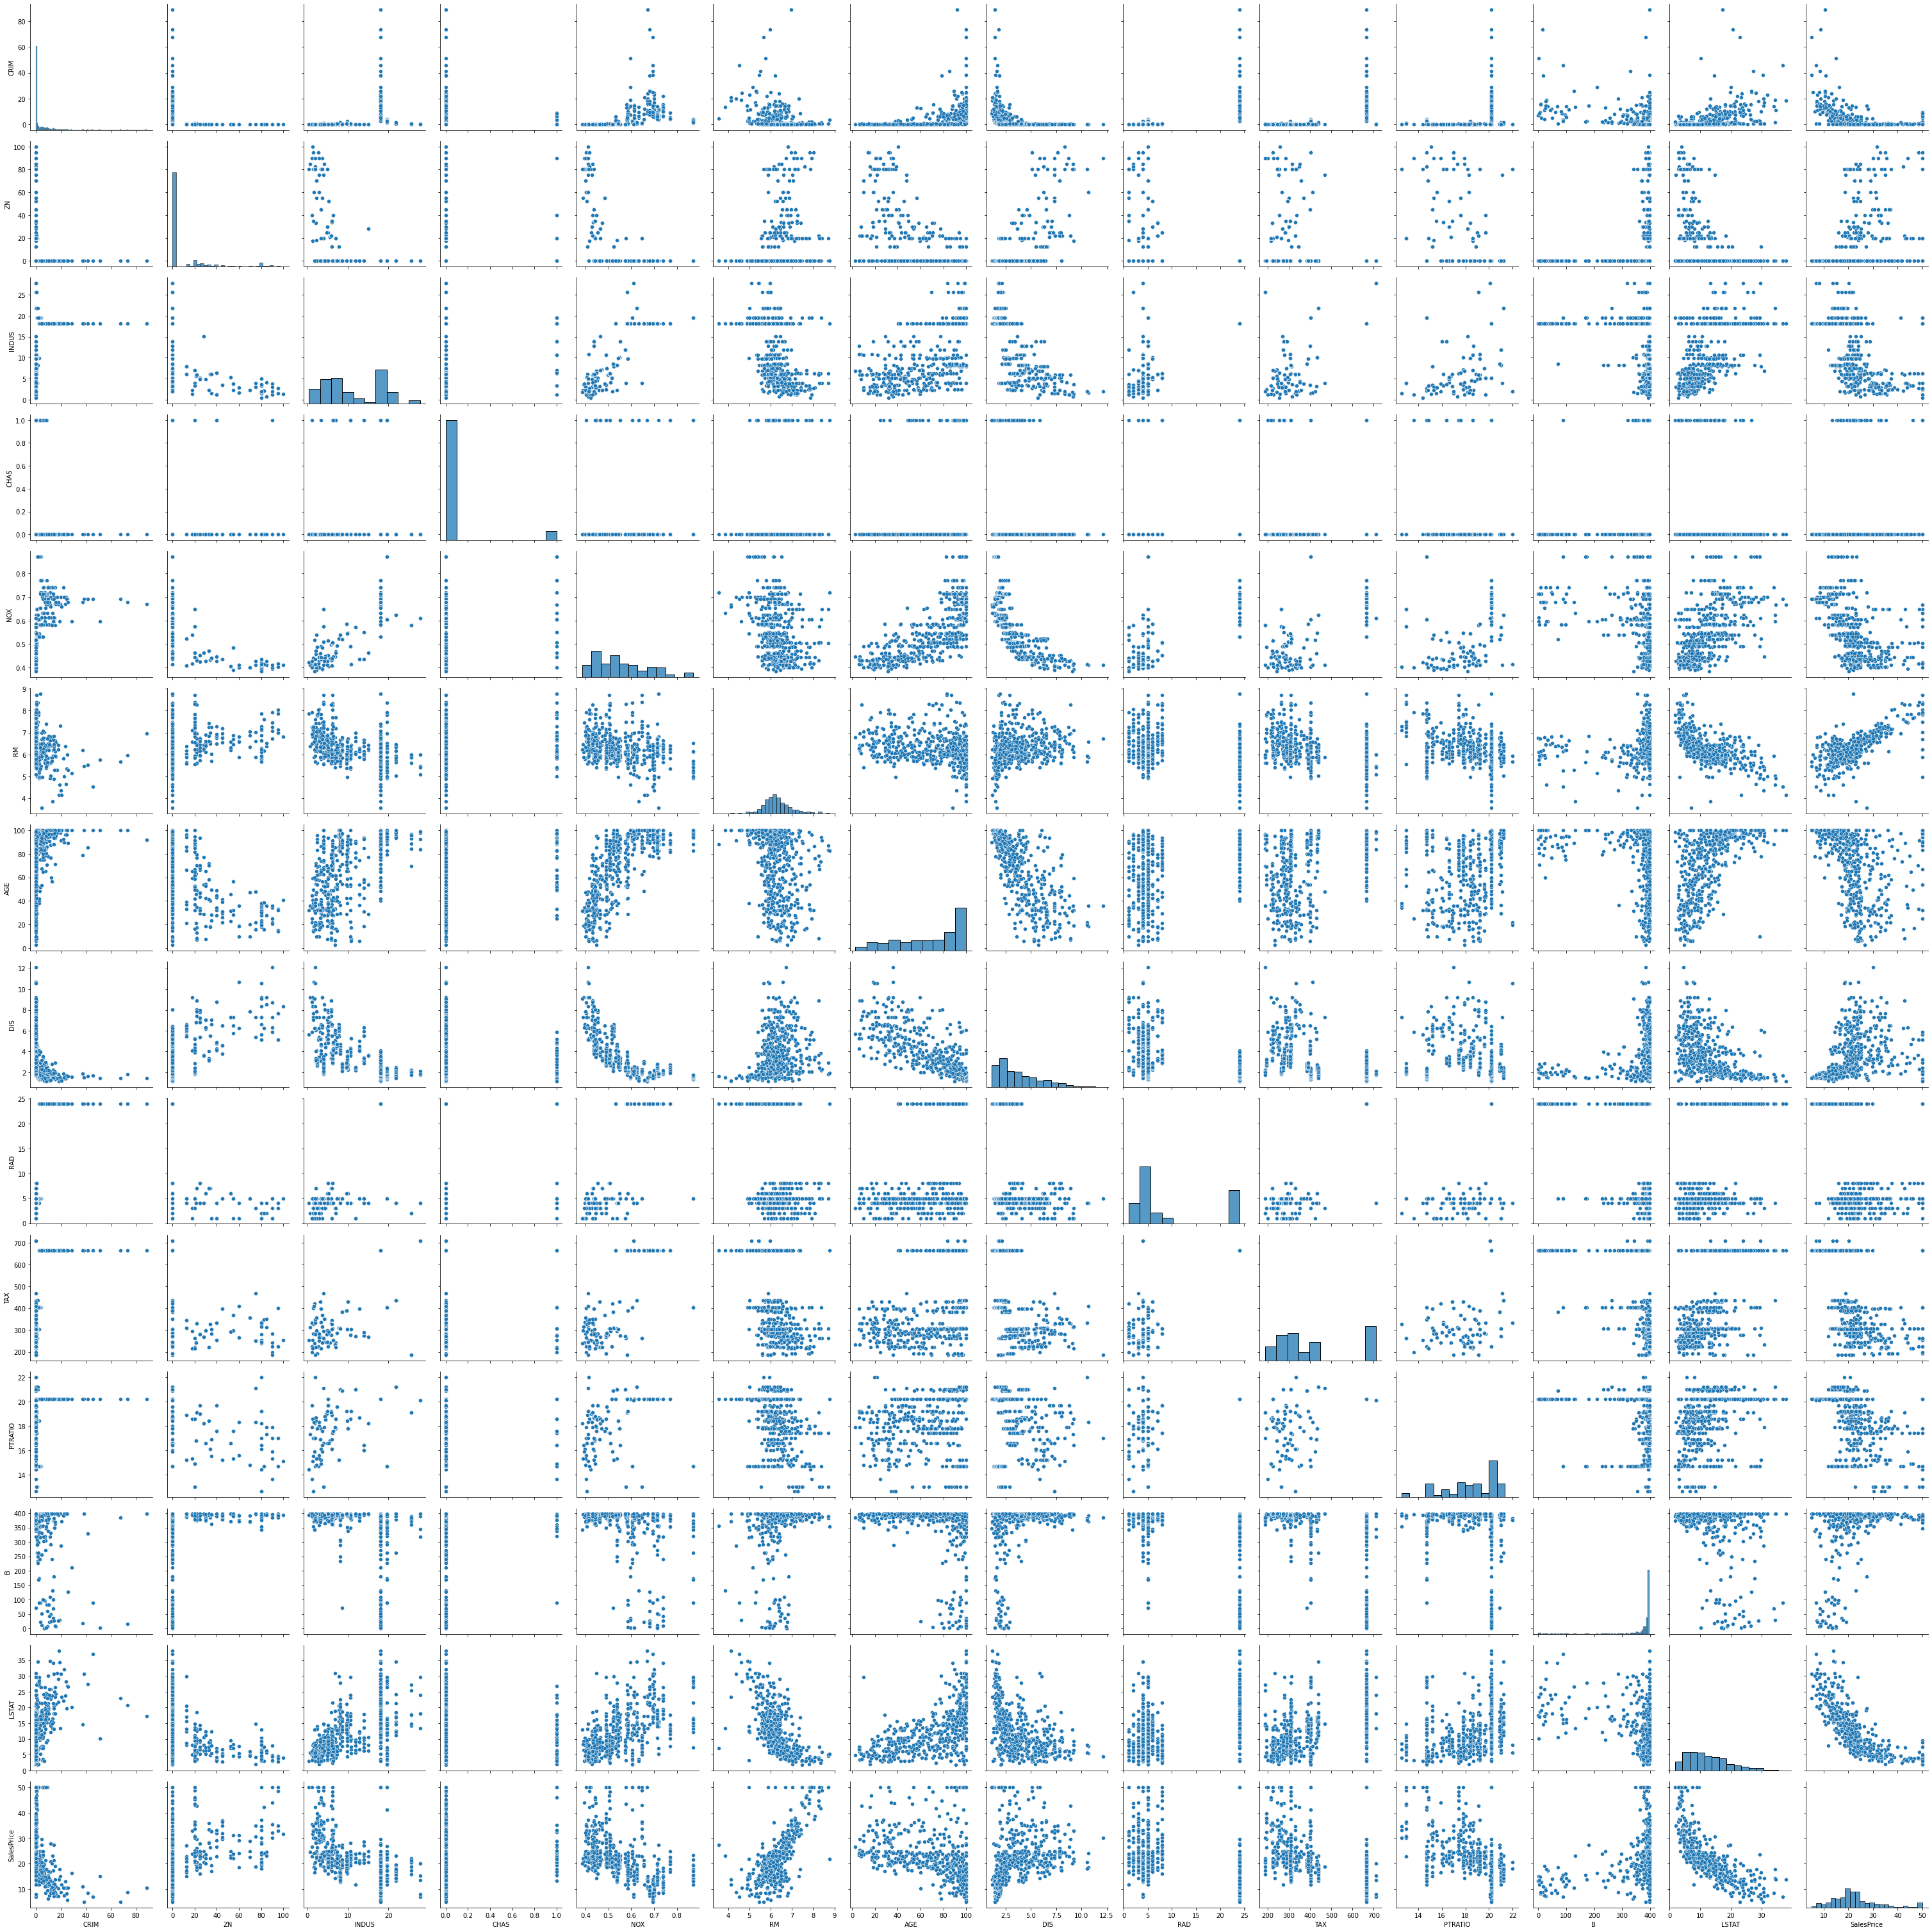

In [8]:
sns.pairplot(data, height=3)
plt.tight_layout()

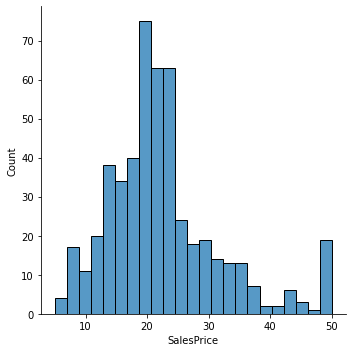

In [9]:
sns.displot(data["SalesPrice"])

In [10]:
print("Skewness: %f" % data['SalesPrice'].skew())
print("Kurtosis: %f" % data['SalesPrice'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


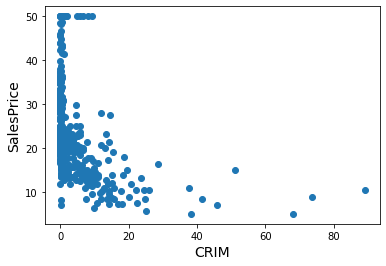

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data['CRIM'], y = data['SalesPrice'])
plt.ylabel('SalesPrice', fontsize=14)
plt.xlabel('CRIM', fontsize=14)
plt.show()

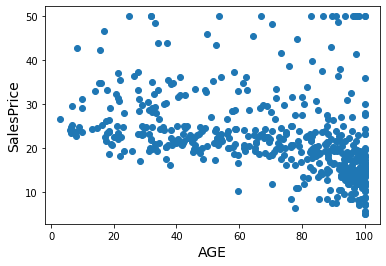

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['SalesPrice'])
plt.ylabel('SalesPrice', fontsize=14)
plt.xlabel('AGE', fontsize=14)
plt.show()

C:\Users\jrtan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



	 mu = 22.53 and sigma = 9.19



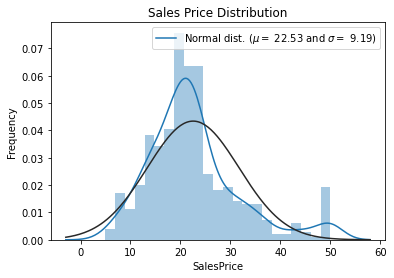

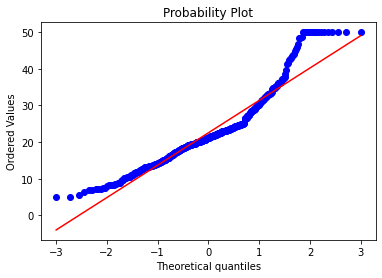

In [13]:
from scipy import stats
from scipy.stats import norm, skew      # For Statistics

sns.distplot(data['SalesPrice'], fit=norm);

(mu, sigma) = norm.fit(data["SalesPrice"])
print('\n\t mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Sales Price Distribution')

# Get also the QQ - plot
fig = plt.figure()
res = stats.probplot(data['SalesPrice'], plot=plt)
plt.show()


	 mu = 3.09 and sigma = 0.39



C:\Users\jrtan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


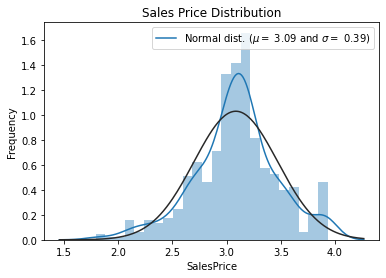

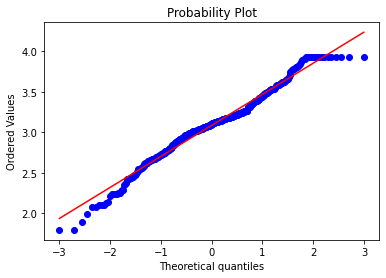

In [14]:
data['SalesPrice'] = np.log1p(data['SalesPrice'])

sns.distplot(data['SalesPrice'], fit=norm);

(mu, sigma) = norm.fit(data["SalesPrice"])
print('\n\t mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Sales Price Distribution')

# Get also the QQ - plot
fig = plt.figure()
res = stats.probplot(data['SalesPrice'], plot=plt)
plt.show()

## Data Correlation

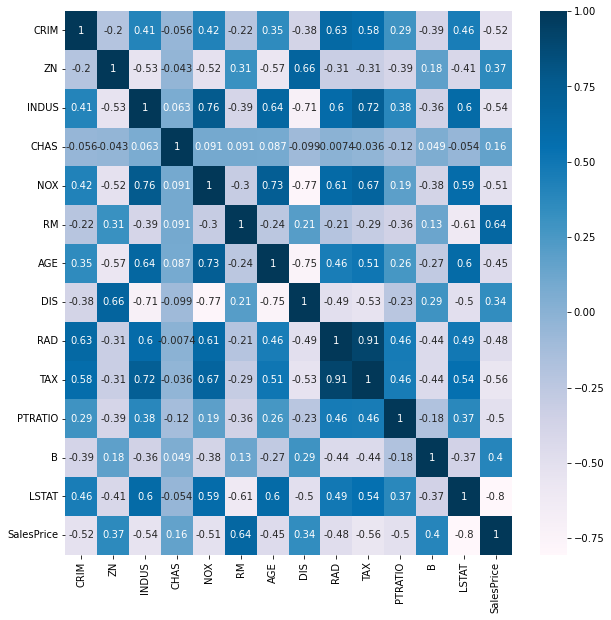

In [16]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [21]:
cor_target = abs(cor["SalesPrice"])              # absolute value of correalation

relevant_features = cor_target[cor_target>0.2]   # Highly correlataed features

names = [index for index, value in relevant_features.iteritems()]   # Getting the name of the features

names.remove('SalesPrice')   # removing the features
print(names)
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


## Building the Model

In [23]:
from sklearn.model_selection import train_test_split

x = data.drop("SalesPrice", axis=1)
y = data["SalesPrice"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


# Overview of Linear Regression

## Straight Line

y = Ɵ1x1 + Ɵ2

## Cost Function

y_pred = matrix_mul(X, theta)
![image.png]

## Gradient Descent



In [63]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((13,))
    
    for i in range(iteration):
        
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred-Y))
        
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        
    return theta

In [64]:
iteration = 100
learning_rate = 0.01
theta = model(x_train, y_train, learning_rate = learning_rate, iteration = iteration)

C:\Users\jrtan\AppData\Local\Temp/ipykernel_2000/4231180085.py:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate*d_theta


In [68]:
np.dot([1, ], theta)

ValueError: shapes (1,) and (13,) not aligned: 1 (dim 0) != 13 (dim 0)